In [235]:
# Q4
import csv

In [236]:
import os
import requests
url = "https://health-infobase.canada.ca/src/data/covidLive/covid19.csv"
r = requests.get(url, allow_redirects=True)

open('covid19.csv', 'wb').write(r.content)
#open('covid19.csv', 'wb').close

151402

In [237]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime

matplotlib.style.use('ggplot')

In [239]:
dateparser = lambda x: pd.datetime.strptime(x,'%d-%m-%Y')
covid_df = pd.read_csv('covid19.csv',header=0, parse_dates=['date'], date_parser=dateparser)
covid_df['Cut Off Date'] = '2020-03-01'
covid_df['Cut Off Date'] = pd.to_datetime(covid_df['Cut Off Date']).dt.date
covid_df['date'] = pd.to_datetime(covid_df['date']).dt.date
covid_df = covid_df[covid_df.prname != 'Canada'] 
covid_df = covid_df[covid_df.prname != 'Repatriated travellers']
covid_df = covid_df[covid_df['date'] >= covid_df['Cut Off Date']]
pivot_df = covid_df.pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
#pivot_df = covid_df.pivot(index = 'prname', columns = 'date', values = 'numtoday').fillna(0)
#covid_df
#pivot_df

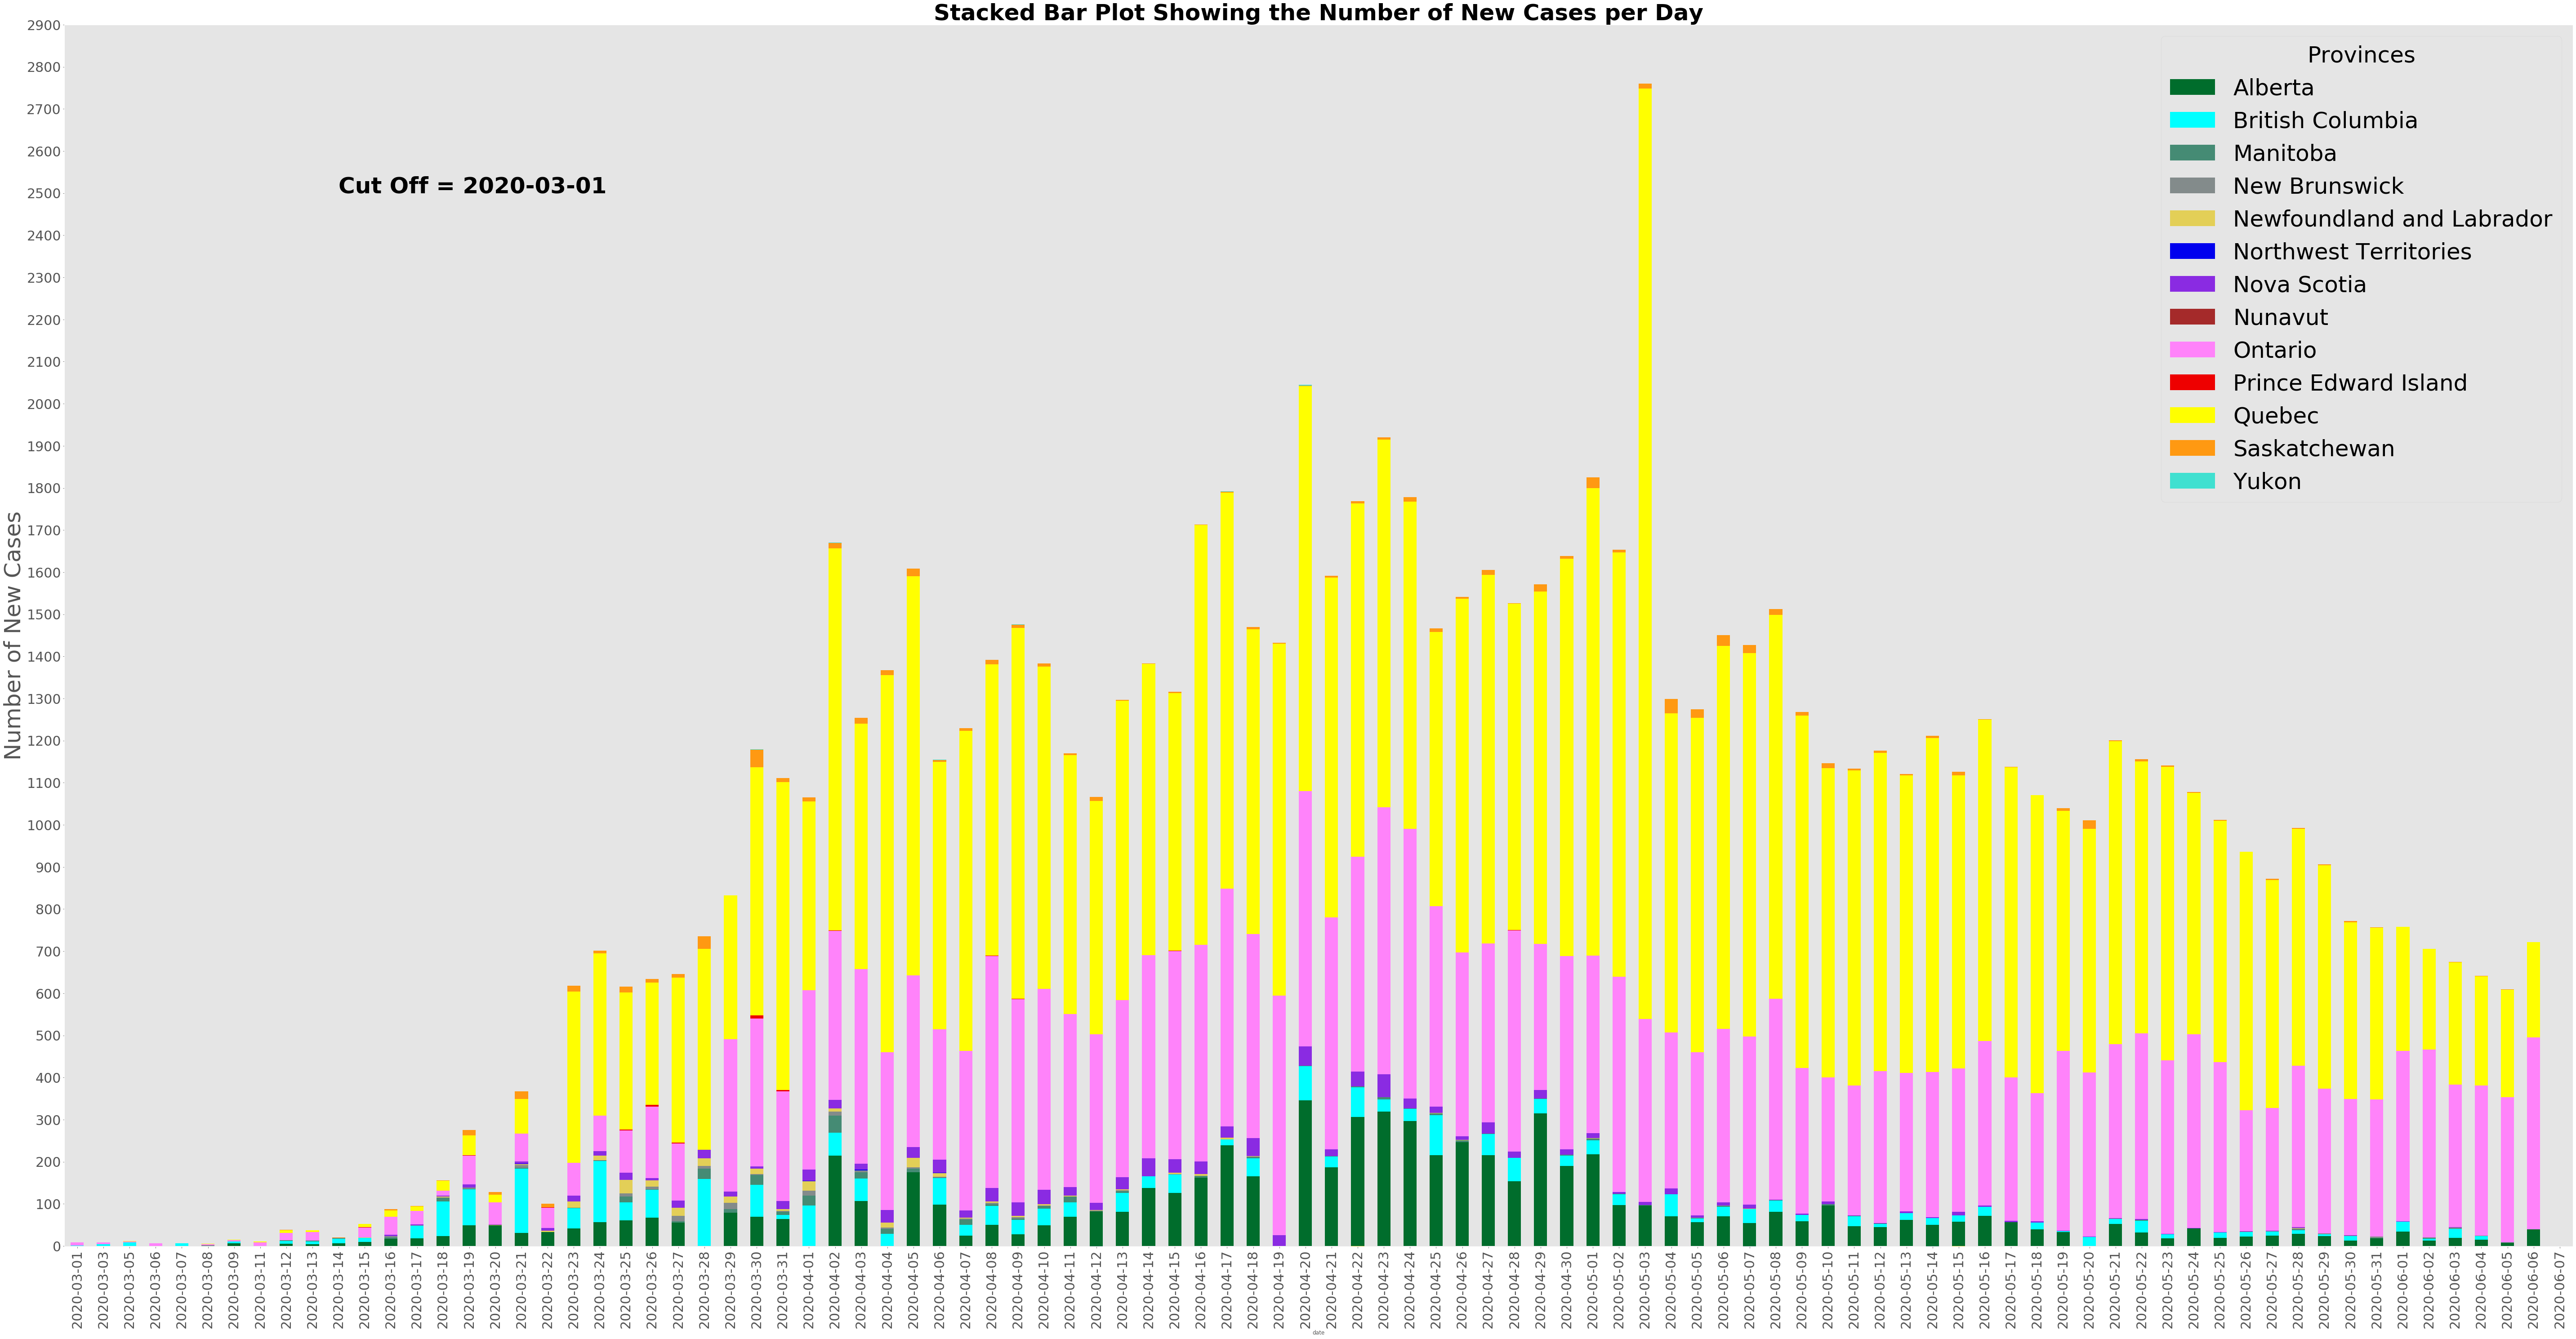

In [240]:
colors = ["#006D2C", "#00FFFF","#458B74","#838B8B","#E3CF57","#0000EE","#8A2BE2","#A52A2A","#FF83FA","#EE0000","#FFFF00","#FF9912","#40E0D0"]
ax = pivot_df.plot.bar(width = 0.5, yticks = np.arange(0,3000,100),grid = False,stacked=True, color=colors,fontsize = 30,figsize=(100,50))
ax.legend(fontsize = 50, title = 'Provinces', title_fontsize=50 )
ax.set_ylabel('Number of New Cases',fontsize = 50)
ax.text(10,2500,'Cut Off = 2020-03-01', fontsize = 50, fontweight = 'bold')
plt.title('Stacked Bar Plot Showing the Number of New Cases per Day',fontsize = 50, fontweight = 'bold')
#for j in range(len(pivot_df)):
 #   for i, data in enumerate(pivot_df[j].get_children()):
  #      label = "{:.d}".format(y)
   #     bl = data.get_xy()
    #    x = 0.5*data.get_width() + bl[0]
     #   y = 0.5*data.get_height() + bl[1]
      #  plt.annotate(label, (x,y),textcoords="offset points", xytext=(0,10),ha='center')
plt.savefig('Q4.png', bbox_inches='tight')